# Complex Network Analysis Tutorial
## Diego Tuccillo

In [10]:
"""
Create and visualize the network of foods and nutrients
"""
import networkx as nx
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy
import csv

In [22]:
#Basic Functions
TG = nx.Graph([("A","eggs"),])
TG.add_node("spinach")
TG.add_node("heating oil")
TG.add_edge("spinach","heating oil")


print(repr(TG.nodes))
print(repr(TG.edges))


NodeView(('A', 'eggs', 'spinach', 'heating oil'))
EdgeView([('A', 'eggs'), ('spinach', 'heating oil')])


In [4]:
!ls 

ComplexNetworkAnalysis.key     TemporalSeries.key
ComplexNetwork_tutorial.ipynb  birth_1959.csv
Exercise.ipynb                 stock_data.csv
LSTM_Tutorial.ipynb            temperatures.csv
Temporal Series Tutorial.ipynb


In [5]:
#import data
with open("nutrients.csv") as infile:
    csv_reader = csv.reader(infile)
    G = nx.Graph(csv_reader)
print(G.nodes())

['A', 'carrots', 'eggs', 'fatty fish', 'green leafy vegs', 'liver', 'milk', 'tomatoes', 'B12', 'B6', 'asparagus', 'beans', 'kidneys', 'potatoes', 'C', 'pumpkins', 'Ca', 'broccoli', 'cheese', 'Cu', 'nuts', 'whole grains', 'D', 'mushrooms', 'E', 'seeds', 'Mn', 'legumes', 'wheat', 'Se', 'Zn', 'beef', 'riboflavin', 'niacin', 'folates', 'spinach', 'poultry', 'shellfish', 'thiamin', 'veg oils', 'yogurt']


In [6]:
loops = list(G.selfloop_edges())
G.remove_edges_from(loops)
print(loops)

[('tomatoes', 'tomatoes')]


In [7]:
#Relabel the Nodels
mapping = {node: node.title() for node in G if isinstance(node, str)}
nx.relabel_nodes(G, mapping, copy=False)
print(G.nodes())

['A', 'B12', 'B6', 'C', 'Ca', 'Cu', 'D', 'E', 'Mn', 'Se', 'Zn', 'Carrots', 'Eggs', 'Fatty Fish', 'Green Leafy Vegs', 'Liver', 'Milk', 'Tomatoes', 'Asparagus', 'Beans', 'Kidneys', 'Potatoes', 'Pumpkins', 'Broccoli', 'Cheese', 'Nuts', 'Whole Grains', 'Mushrooms', 'Seeds', 'Legumes', 'Wheat', 'Beef', 'Riboflavin', 'Niacin', 'Folates', 'Spinach', 'Poultry', 'Shellfish', 'Thiamin', 'Veg Oils', 'Yogurt']


In [8]:
#Add attributes
nutrients = set(("B12", "Zn", "D", "B6", "A", "Se", "Cu", "Folates",
                 "Ca", "Mn", "Thiamin", "Riboflavin", "C", "E", "Niacin"))
nutrient_dict = {node: (node in nutrients) for node in G}
nx.set_node_attributes(G, nutrient_dict, "nutrient")

In [11]:
# Prepare for drawing
colors = ["yellow" if n[1]["nutrient"] else "pink" for n in
          G.nodes(data=True)]
dzcnapy.medium_attrs["node_color"] = colors

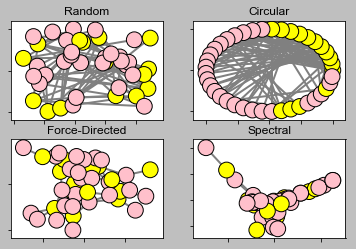

In [15]:
# Draw four layouts in four subplots
_, plot = plt.subplots(2, 2)
subplots = plot.reshape(1, 4)[0]
layouts = (nx.random_layout, nx.circular_layout, nx.spring_layout,
           nx.spectral_layout)
titles = ("Random", "Circular", "Force-Directed", "Spectral")
for plot, layout, title in zip(subplots, layouts, titles):
    pos = layout(G)
    nx.draw_networkx(G, pos=pos, ax=plot, with_labels=False, 
                     **dzcnapy.medium_attrs)
    plot.set_title(title)
    dzcnapy.set_extent(pos, plot)

